In [2]:
%load_ext line_profiler

In [1]:
import torch
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
from time import time

In [2]:
# from importlib import reload

# import GTN2
# reload(GTN2)
# from GTN2 import *

In [3]:
# from importlib import reload

# import utils
# reload(utils)
# from utils import *

In [10]:
from importlib import reload

import GTN2_torch
reload(GTN2_torch)
from GTN2_torch import *

In [11]:
from importlib import reload

import utils_torch
reload(utils_torch)
from utils_torch import *

In [12]:
from importlib import reload

import plot_utils
reload(plot_utils)
from plot_utils import *

In [13]:
def measure_feedback_layer(gtn2,):
    # margin_x=0 if gtn2.bcx==1 else gtn2.nshell
    margin_x=0 
    ilist = range(margin_x,gtn2.Lx-margin_x)
    # margin_y=0 if gtn2.bcy==1 else gtn2.nshell
    margin_y=0
    jlist = range(margin_y,gtn2.Ly-margin_y)
    ij_list = [(i,j) for i in (ilist) for j in (jlist)]
    for i,j in (ij_list):
        gtn2.measure_feedback(ij = [i,j])

In [14]:
def randomize(gtn2,measure=True):
    for i in tqdm(range(2*gtn2.L+1,4*gtn2.L,2),desc='randomize'):
        # print([i, (i+1)%(2*gtn2.L)+2*gtn2.L])
        gtn2.randomize([i, (i+1)%(2*gtn2.L)+2*gtn2.L])
    if measure:
        for i in tqdm(range(2*gtn2.L,4*gtn2.L,2),desc='measure'):
            gtn2.measure_single_mode_Born([i,i+1],mode=[1])

# Dense

In [9]:
gtn2=GTN2(Lx=20,Ly=20,history=False,random_init=True,random_U1=True,bcx=1,bcy=1,seed=0,orbit=2,nshell=2,layer=2,sparse=False)

# op=kraus([0,1/np.sqrt(2),1/np.sqrt(2)])
# ix = np.arange(0,2).tolist()
# ix_bar = np.arange(2,gtn2.C_m.shape[0]).tolist()
op=(op_single_mode(((1,)*50,1)))
ix = np.arange(0,100).tolist()
ix_bar = np.arange(100,gtn2.C_m.shape[0]).tolist()

In [149]:
Gamma=gtn2.C_m.copy()

In [153]:
P_contraction_2(gtn2.C_m,op,ix,ix_bar,)

In [104]:
%timeit P_contraction_2(gtn2.C_m,op,ix,ix_bar,)

543 ms ± 847 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## C=0 -> C=1

In [24]:
gtn2=GTN2_torch(Lx=15,Ly=15,history=False,random_init=True,bcx=1,bcy=1,seed=0,orbit=2,nshell=3,layer=2,complex128=True)
mu_list=[1]
gtn2.a_i={}
gtn2.b_i={}
gtn2.A_i={}
gtn2.B_i={}
for mu in mu_list:
    gtn2.a_i[mu],gtn2.b_i[mu] = amplitude(gtn2.nshell,tau=[0,1],geometry='square',lower=True,mu=mu)
    gtn2.A_i[mu],gtn2.B_i[mu] = amplitude(gtn2.nshell,tau=[1,0],geometry='square',lower=False,mu=mu)

Using cuda
GPU Model: NVIDIA A100-PCIE-40GB


Text(0, 0.5, '$j$')

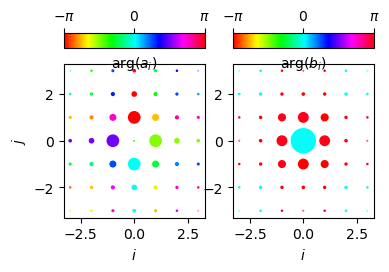

In [25]:
fig,ax=plt.subplots(1,2,figsize=(4,2))
mu=1
i_list,j_list,a_list=convert_to_list(gtn2.a_i[mu])
im=ax[0].scatter(i_list,j_list,s=400*np.abs(a_list),c=np.angle(a_list),vmin=-np.pi,vmax=np.pi,cmap='hsv')

i_list,j_list,b_list=convert_to_list(gtn2.b_i[mu])
im=ax[1].scatter(i_list,j_list,s=400*np.abs(b_list),c=np.angle(b_list),vmin=-np.pi,vmax=np.pi,cmap='hsv')

place_color_bar_top(im,ax[0],r'$\arg(a_i)$')
place_color_bar_top(im,ax[1],r'$\arg(b_i)$')

[ax.set_xlabel('$i$') for ax in ax]
ax[0].set_ylabel('$j$')

# fig.savefig('mu1_nshell4.pdf',bbox_inches='tight')



Text(0, 0.5, '$j$')

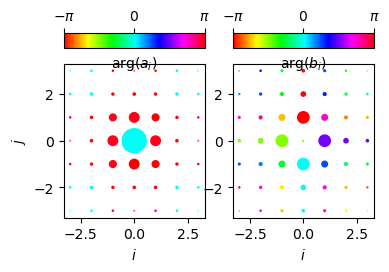

In [26]:
fig,ax=plt.subplots(1,2,figsize=(4,2))
mu=1
i_list,j_list,a_list=convert_to_list(gtn2.A_i[mu])
im=ax[0].scatter(i_list,j_list,s=400*np.abs(a_list),c=np.angle(a_list),vmin=-np.pi,vmax=np.pi,cmap='hsv')

i_list,j_list,b_list=convert_to_list(gtn2.B_i[mu])
im=ax[1].scatter(i_list,j_list,s=400*np.abs(b_list),c=np.angle(b_list),vmin=-np.pi,vmax=np.pi,cmap='hsv')

place_color_bar_top(im,ax[0],r'$\arg(a_i)$')
place_color_bar_top(im,ax[1],r'$\arg(b_i)$')

[ax.set_xlabel('$i$') for ax in ax]
ax[0].set_ylabel('$j$')

# fig.savefig('mu1_nshell4.pdf',bbox_inches='tight')



In [27]:
nu_list =[]
A_idx_0,B_idx_0,C_idx_0 = gtn2.generate_tripartite_circle()

In [28]:
nu_list.append( chern_number_quick(gtn2.C_m,A_idx_0,B_idx_0,C_idx_0,device=gtn2.device,dtype=gtn2.dtype_float))
for i in tqdm(range(gtn2.Lx)):
    measure_feedback_layer(gtn2)
    randomize(gtn2,measure=True)
    nu_list.append( chern_number_quick(gtn2.C_m,A_idx_0,B_idx_0,C_idx_0,device=gtn2.device,dtype=gtn2.dtype_float))
nu_list=torch.tensor(nu_list)

Chern number done in 0.0028


  0%|                                                                                                                                                    | 0/15 [00:00<?, ?it/s]

  7%|█████████▎                                                                                                                                  | 1/15 [00:03<00:52,  3.76s/it]

Chern number done in 0.0009


 13%|██████████████████▋                                                                                                                         | 2/15 [00:07<00:46,  3.57s/it]

Chern number done in 0.0014


 20%|████████████████████████████                                                                                                                | 3/15 [00:10<00:41,  3.46s/it]

Chern number done in 0.0009


 27%|█████████████████████████████████████▎                                                                                                      | 4/15 [00:13<00:37,  3.38s/it]

Chern number done in 0.0009


 33%|██████████████████████████████████████████████▋                                                                                             | 5/15 [00:17<00:33,  3.36s/it]

Chern number done in 0.0009


 40%|████████████████████████████████████████████████████████                                                                                    | 6/15 [00:20<00:30,  3.35s/it]

Chern number done in 0.0010


 47%|█████████████████████████████████████████████████████████████████▎                                                                          | 7/15 [00:23<00:26,  3.31s/it]

Chern number done in 0.0009


 53%|██████████████████████████████████████████████████████████████████████████▋                                                                 | 8/15 [00:26<00:23,  3.30s/it]

Chern number done in 0.0009


 60%|████████████████████████████████████████████████████████████████████████████████████                                                        | 9/15 [00:30<00:19,  3.29s/it]

Chern number done in 0.0010


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 10/15 [00:33<00:16,  3.27s/it]

Chern number done in 0.0009


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 11/15 [00:36<00:12,  3.24s/it]

Chern number done in 0.0009


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 12/15 [00:39<00:09,  3.22s/it]

Chern number done in 0.0009


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 13/15 [00:42<00:06,  3.21s/it]

Chern number done in 0.0009


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 14/15 [00:46<00:03,  3.20s/it]

Chern number done in 0.0010


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:49<00:00,  3.29s/it]

Chern number done in 0.0009


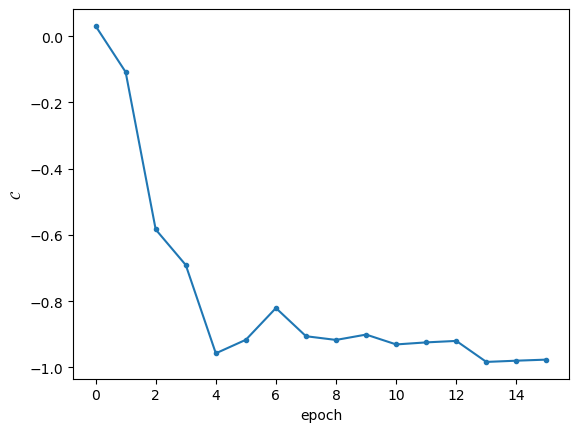

In [32]:
plot_chern(nu_list)

In [33]:
fig,ax=plt.subplots(figsize=(3.4,2))
plot_chern(nu_list,log=True,C=1,ax=ax)

Error in callback <function _draw_all_if_interactive at 0x7f11fac7d9e0> (for post_execute), with arguments args (),kwargs {}:


ValueError: 
\abs{\abs{\mathcal{C}}-1}
^
ParseFatalException: Unknown symbol: \abs, found '\'  (at char 0), (line:1, col:1)

ValueError: 
\abs{\abs{\mathcal{C}}-1}
^
ParseFatalException: Unknown symbol: \abs, found '\'  (at char 0), (line:1, col:1)

<Figure size 340x200 with 1 Axes>

## C=1 -> 0

In [34]:
gtn2=GTN2_torch(Lx=15,Ly=15,history=False,random_init=True,bcx=1,bcy=1,seed=0,orbit=2,nshell=2,layer=2)

mu_list=[2.1]
gtn2.a_i={}
gtn2.b_i={}
gtn2.A_i={}
gtn2.B_i={}
for mu in mu_list:
    gtn2.a_i[mu],gtn2.b_i[mu] = amplitude(gtn2.nshell,tau=[0,1],geometry='square',lower=True,mu=mu)
    gtn2.A_i[mu],gtn2.B_i[mu] = amplitude(gtn2.nshell,tau=[1,0],geometry='square',lower=False,mu=mu)

Using cuda
GPU Model: NVIDIA A100-PCIE-40GB


In [ ]:
with open('C_m_L15.pickle','rb') as f:
    C_m=pickle.load(f)
gtn2.C_m[:2*gtn2.L,:2*gtn2.L]=C_m
gtn2.C_m_history[0]=gtn2.C_m.copy()

## C=0 -> C=2

In [35]:
gtn2=GTN2_torch(Lx=15,Ly=15,history=False,random_init=True,bcx=1,bcy=1,seed=0,orbit=2,nshell=2,layer=2)
mu_list=[1]
gtn2.a_i={}
gtn2.b_i={}
gtn2.A_i={}
gtn2.B_i={}
for mu in mu_list:
    gtn2.a_i[mu],gtn2.b_i[mu] = amplitude(gtn2.nshell,tau=[0,1],geometry='square',lower=True,mu=mu,C=2)
    gtn2.A_i[mu],gtn2.B_i[mu] = amplitude(gtn2.nshell,tau=[1,0],geometry='square',lower=False,mu=mu,C=2)

Using cuda
GPU Model: NVIDIA A100-PCIE-40GB


Text(0, 0.5, '$j$')

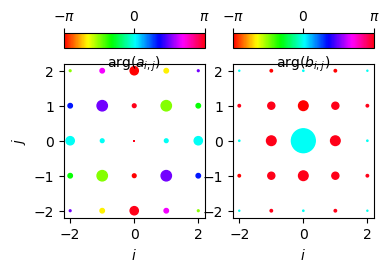

In [36]:
fig,ax=plt.subplots(1,2,figsize=(4,2))
mu=1
i_list,j_list,a_list=convert_to_list(gtn2.a_i[mu])
im=ax[0].scatter(i_list,j_list,s=400*np.abs(a_list),c=np.angle(a_list),vmin=-np.pi,vmax=np.pi,cmap='hsv')

i_list,j_list,b_list=convert_to_list(gtn2.b_i[mu])
im=ax[1].scatter(i_list,j_list,s=400*np.abs(b_list),c=np.angle(b_list),vmin=-np.pi,vmax=np.pi,cmap='hsv')

place_color_bar_top(im,ax[0],r'$\arg(a_{i,j})$')
place_color_bar_top(im,ax[1],r'$\arg(b_{i,j})$')

[ax.set_xlabel('$i$') for ax in ax]
ax[0].set_ylabel('$j$')

# fig.savefig('mu1_nshell4_C2.pdf',bbox_inches='tight')



In [37]:
nu_list =[]
A_idx_0,B_idx_0,C_idx_0 = gtn2.generate_tripartite_circle()

In [39]:
nu_list.append( chern_number_quick(gtn2.C_m,A_idx_0,B_idx_0,C_idx_0,device=gtn2.device,dtype=gtn2.dtype_float))
for i in tqdm(range(gtn2.Lx)):
    measure_feedback_layer(gtn2)
    randomize(gtn2,measure=True)
    nu_list.append( chern_number_quick(gtn2.C_m,A_idx_0,B_idx_0,C_idx_0,device=gtn2.device,dtype=gtn2.dtype_float))
nu_list=torch.tensor(nu_list)

Chern number done in 0.0080


  0%|                                                                                                                                                    | 0/15 [00:00<?, ?it/s]

  7%|█████████▎                                                                                                                                  | 1/15 [00:03<00:45,  3.24s/it]

Chern number done in 0.0009


 13%|██████████████████▋                                                                                                                         | 2/15 [00:06<00:39,  3.05s/it]

Chern number done in 0.0009


 20%|████████████████████████████                                                                                                                | 3/15 [00:09<00:35,  2.97s/it]

Chern number done in 0.0009


 27%|█████████████████████████████████████▎                                                                                                      | 4/15 [00:11<00:32,  2.92s/it]

Chern number done in 0.0009


 33%|██████████████████████████████████████████████▋                                                                                             | 5/15 [00:14<00:28,  2.86s/it]

Chern number done in 0.0009


 40%|████████████████████████████████████████████████████████                                                                                    | 6/15 [00:17<00:25,  2.82s/it]

Chern number done in 0.0011


 47%|█████████████████████████████████████████████████████████████████▎                                                                          | 7/15 [00:20<00:22,  2.79s/it]

Chern number done in 0.0009


 53%|██████████████████████████████████████████████████████████████████████████▋                                                                 | 8/15 [00:22<00:19,  2.80s/it]

Chern number done in 0.0009


 60%|████████████████████████████████████████████████████████████████████████████████████                                                        | 9/15 [00:25<00:16,  2.79s/it]

Chern number done in 0.0009


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 10/15 [00:28<00:13,  2.80s/it]

Chern number done in 0.0009


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 11/15 [00:31<00:11,  2.79s/it]

Chern number done in 0.0009


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 12/15 [00:34<00:08,  2.78s/it]

Chern number done in 0.0009


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 13/15 [00:36<00:05,  2.77s/it]

Chern number done in 0.0009


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 14/15 [00:39<00:02,  2.78s/it]

Chern number done in 0.0009


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:42<00:00,  2.82s/it]

Chern number done in 0.0009


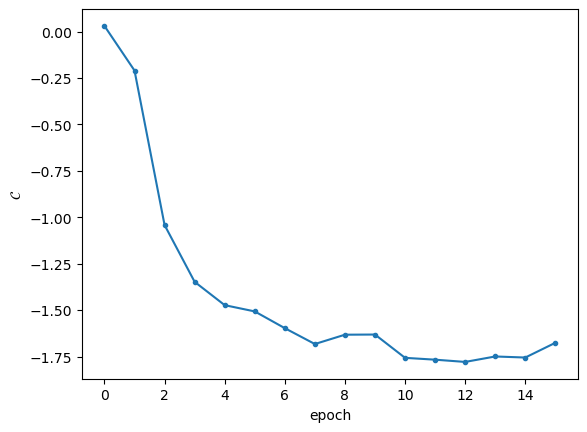

In [40]:
plot_chern(nu_list)

# Torch

In [191]:
gtn2_torch=GTN2_torch(Lx=15,Ly=15,history=False,random_init=False,random_U1=True,bcx=1,bcy=1,seed=1,orbit=2,nshell=2,layer=2,replica=2,complex128=True)

mu_list=[1]
gtn2_torch.a_i={}
gtn2_torch.b_i={}
gtn2_torch.A_i={}
gtn2_torch.B_i={}
for mu in mu_list:
    gtn2_torch.a_i[mu],gtn2_torch.b_i[mu] = amplitude(gtn2_torch.nshell,tau=[0,1],geometry='square',lower=True,mu=mu,C=1)
    gtn2_torch.A_i[mu],gtn2_torch.B_i[mu] = amplitude(gtn2_torch.nshell,tau=[1,0],geometry='square',lower=False,mu=mu,C=1)

Using cuda


In [192]:
nu_list =[]
A_idx_0,B_idx_0,C_idx_0 = gtn2_torch.generate_tripartite_circle()
nu_list.append(chern_number_quick(gtn2_torch.C_m,A_idx_0,B_idx_0,C_idx_0,device=gtn2_torch.device,dtype=gtn2_torch.dtype_float))


In [193]:
for i in tqdm(range(5)):
    randomize(gtn2_torch,measure=True)
    measure_feedback_layer(gtn2_torch)
    nu_list.append( chern_number_quick(gtn2_torch.C_m,A_idx_0,B_idx_0,C_idx_0,device=gtn2_torch.device,dtype=gtn2_torch.dtype_float))


100%|██████████| 5/5 [01:14<00:00, 14.81s/it]


In [194]:
ilist=np.arange(0,gtn2_torch.Lx)
jlist=np.arange(0,gtn2_torch.Ly)
subregion_m = torch.hstack((
    torch.from_numpy(gtn2_torch.linearize_idx_span(ilist = ilist,jlist=jlist,layer=0)).cuda(),
    torch.from_numpy(gtn2_torch.linearize_idx_span(ilist = ilist,jlist=jlist,layer=1)).cuda())
)

EC=gtn2_torch.entanglement_contour(subregion_m,fermion_idx=False,Gamma=gtn2_torch.C_m)
EC_grid=EC.reshape((2,ilist.shape[0],jlist.shape[0],2,2)).sum(axis=(-1,-2)).cpu().numpy()

(<matplotlib.image.AxesImage at 0x7fd83a9035e0>,
 <matplotlib.collections.PathCollection at 0x7fd83a9d93c0>)

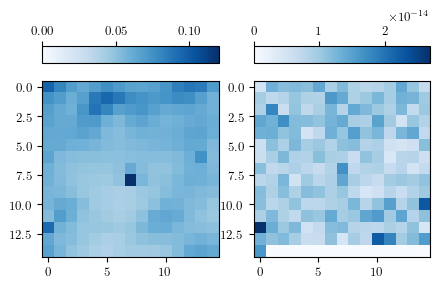

In [208]:
fig,ax=plt.subplots(1,2,figsize=(5,2.5))
plot_EC(EC_grid,ax=ax,vmax=None)

In [196]:
C_r=gtn2_torch.local_Chern_marker(gtn2_torch.C_m,)

(<matplotlib.image.AxesImage at 0x7fd8421a5a80>,
 <matplotlib.collections.PathCollection at 0x7fd83efc1ab0>)

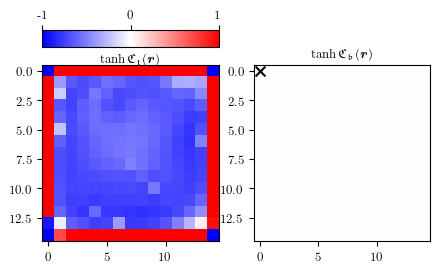

In [197]:
fig,ax=plt.subplots(1,2,figsize=(5,2.5))
plot_C_r(C_r.cpu()[0],ax=ax,bottomcb=False,label_pos=[None,(0,0)])

# DW

In [45]:
def measure_feedback_layer_dw_line(gtn2,overlap,geometry,truncate=False):
    ilist = range(gtn2.Lx)
    jlist = range(gtn2.Ly)
    ij_list = [(i,j) for i in (ilist) for j in (jlist)]
    margin=0 if overlap else gtn2.nshell
    inner_list = range(gtn2.Lx//5+margin,gtn2.Lx//5*4-margin)
    outer_list = range(gtn2.Lx//5-margin,gtn2.Lx//5*4+margin)
    if geometry == 'square':
        inner_region=set([(i,j) for i in inner_list for j in inner_list])
        outer_region=set([(i,j) for i in ilist for j in jlist if i not in outer_list or j not in outer_list])
    elif geometry == 'strip':
        inner_region=set([(i,j) for i in inner_list for j in jlist])
        outer_region=set([(i,j) for i in ilist for j in jlist if i not in outer_list])
    region_inner=inner_region if truncate else None
    region_outer=outer_region if truncate else None
    for i,j in tqdm(ij_list,desc='measure with feedback'):
        if (i,j) in inner_region:
            gtn2.measure_feedback(ij = [i,j],mu=1,region=region_inner)
        elif (i,j) in outer_region:
            gtn2.measure_feedback(ij = [i,j],mu=3,region=region_outer)


In [46]:
gtn2=GTN2_torch(Lx=20,Ly=20,history=False,random_init=False,bcx=1,bcy=1,seed=0,orbit=2,nshell=2,layer=2,replica=2,)


mu_list=[1,3]
gtn2.a_i={}
gtn2.b_i={}
gtn2.A_i={}
gtn2.B_i={}
for mu in mu_list:
    gtn2.a_i[mu],gtn2.b_i[mu] = amplitude(gtn2.nshell,tau=[0,1],geometry='square',lower=True,mu=mu)
    gtn2.A_i[mu],gtn2.B_i[mu] = amplitude(gtn2.nshell,tau=[1,0],geometry='square',lower=False,mu=mu)


Using cuda
GPU Model: NVIDIA A100-PCIE-40GB


In [47]:
# nu_list =[]
# A_idx_0,B_idx_0,C_idx_0 = gtn2.generate_tripartite_circle()

ilist=np.arange(0,gtn2.Lx)
jlist=np.arange(0,gtn2.Ly)
subregion_m = torch.hstack((
    torch.from_numpy(gtn2.linearize_idx_span(ilist = ilist,jlist=jlist,layer=0)).cuda(),
    torch.from_numpy(gtn2.linearize_idx_span(ilist = ilist,jlist=jlist,layer=1)).cuda())
)
EC_list=[]
C_r_list=[]

In [48]:
# nu_list.append( chern_number_quick(gtn2.C_m,A_idx_0,B_idx_0,C_idx_0,device=gtn2.device,dtype=gtn2.dtype_float))
EC_list.append( gtn2.entanglement_contour(subregion_m,fermion_idx=False,Gamma=gtn2.C_m).reshape((2,ilist.shape[0],jlist.shape[0],2,2)).sum(axis=(-1,-2))) 
C_r_list.append( gtn2.local_Chern_marker(gtn2.C_m,))

for i in (range(10)):
    measure_feedback_layer_dw_line(gtn2,overlap=True,geometry='strip',truncate=True)
    randomize(gtn2,measure=True)
    
    # nu_list.append( chern_number_quick(gtn2.C_m,A_idx_0,B_idx_0,C_idx_0,device=gtn2.device,dtype=gtn2.dtype_float))
    EC_list.append( gtn2.entanglement_contour(subregion_m,fermion_idx=False,Gamma=gtn2.C_m).reshape((2,ilist.shape[0],jlist.shape[0],2,2)).sum(axis=(-1,-2))) 
    C_r_list.append( gtn2.local_Chern_marker(gtn2.C_m,))




measure with feedback: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:05<00:00, 73.52it/s]


In [16]:
chern_number_quick(gtn2.C_m,A_idx_0,B_idx_0,C_idx_0,device=gtn2.device,dtype=gtn2.dtype_float)

0.0

In [41]:
EC_list.append(gtn2.get_C_f(gtn2.C_m,))

In [46]:
EC_list[-1].nelement()*EC_list[-1].element_size()

6400

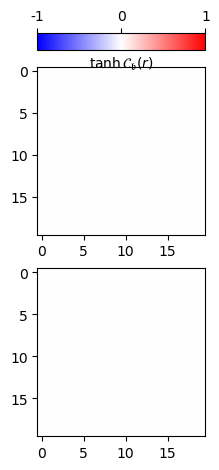

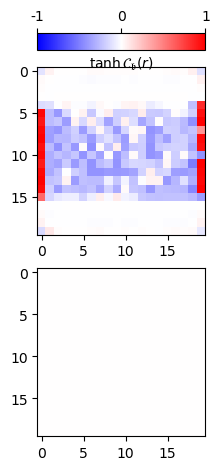

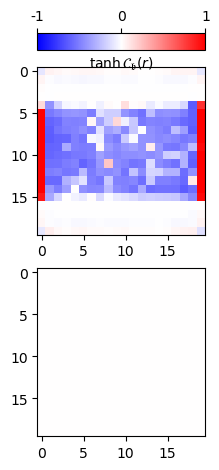

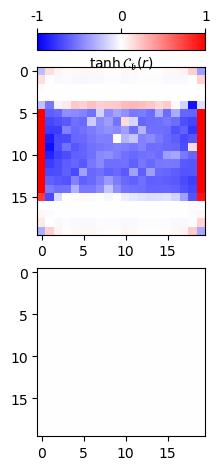

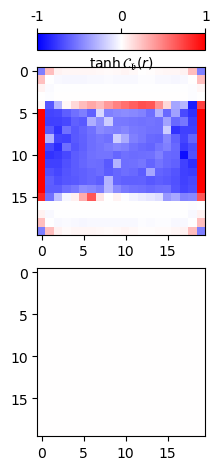

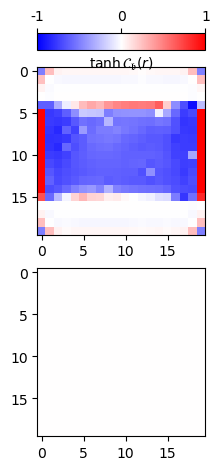

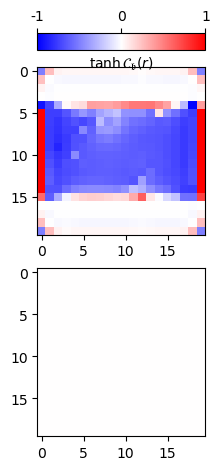

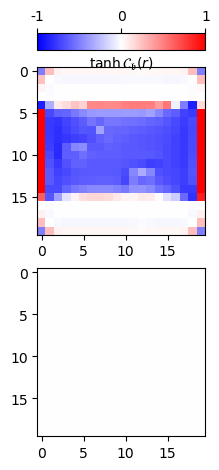

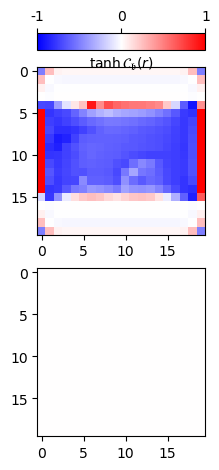

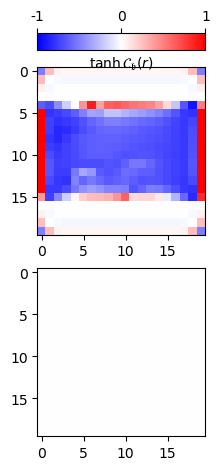

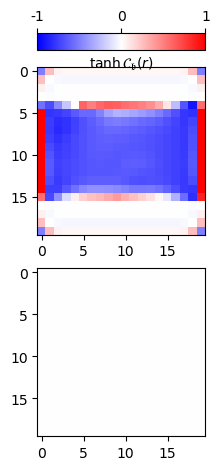

In [49]:
for idx in range(len(C_r_list)):
    fig,ax=plt.subplots(2,1)
    plot_C_r(C_r_list[idx][0].cpu(),ax,bottomcb=False)

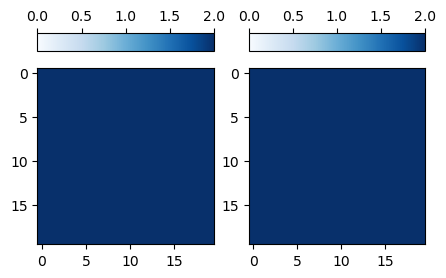

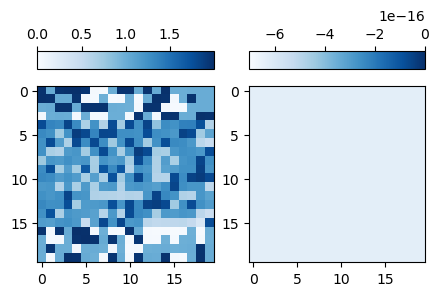

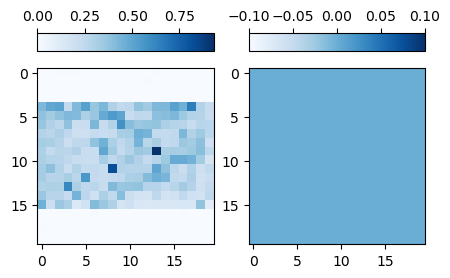

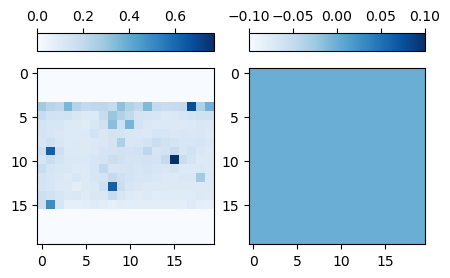

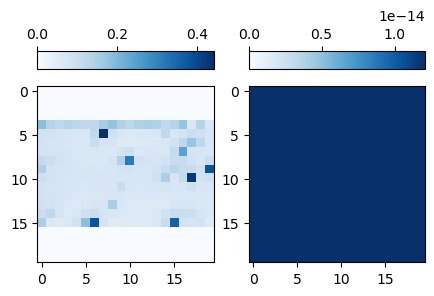

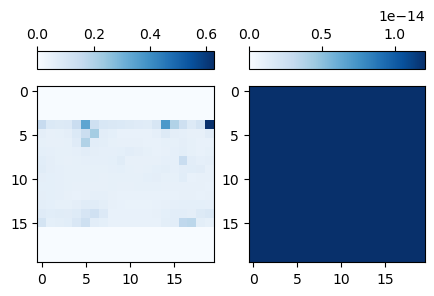

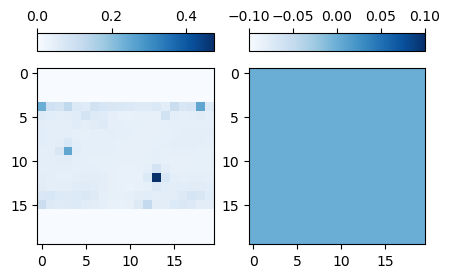

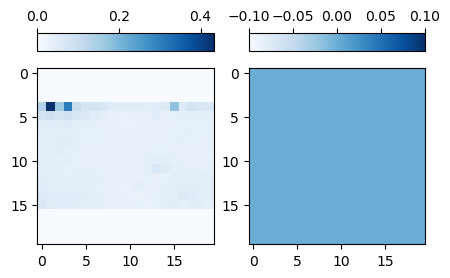

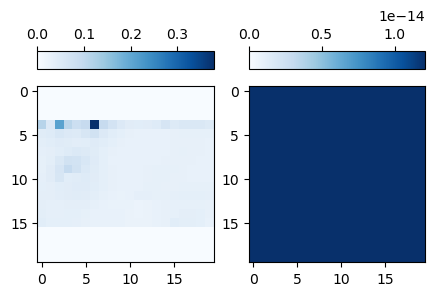

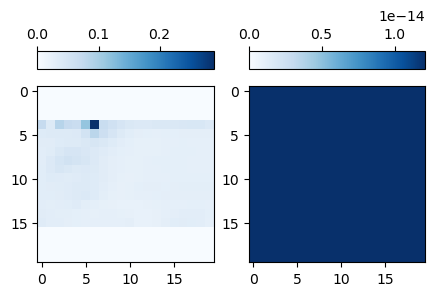

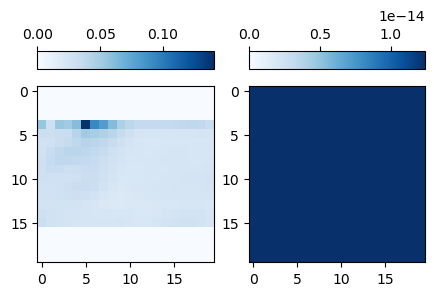

In [50]:
for idx in range(len(EC_list)):
    fig,ax=plt.subplots(1,2,figsize=(5,2.5))
    plot_EC(EC_list[idx].cpu(),ax=ax,vmax=None)

In [ ]:
fig,ax=plt.subplots(figsize=(4,4),)
im=ax.imshow((EC_list[-1][0])/np.log(2),cmap='Blues',vmin=0,)
axins=ax.inset_axes([0.,1.15,1,0.1])
plt.colorbar(im,cax=axins,label='EC',orientation='horizontal')
ax.set_xlabel('$j$')
ax.set_ylabel('$i$')

In [ ]:
for i in tqdm(range(5)):
    randomize(gtn2_torch,measure=True)
    measure_feedback_layer(gtn2_torch)
    nu_list.append( chern_number_quick(gtn2_torch.C_m,A_idx_0,B_idx_0,C_idx_0,device=gtn2_torch.device,dtype=gtn2_torch.dtype_float))


## Single copy

In [51]:
def run(seed):
    gtn2_torch=GTN2_torch(Lx=15,Ly=15,history=False,random_init=True,random_U1=True,bcx=1,bcy=1,seed=seed,orbit=2,nshell=2,layer=2,complex128=True)

    mu_list=[1]
    gtn2_torch.a_i={}
    gtn2_torch.b_i={}
    gtn2_torch.A_i={}
    gtn2_torch.B_i={}
    for mu in mu_list:
        gtn2_torch.a_i[mu],gtn2_torch.b_i[mu] = amplitude(gtn2_torch.nshell,tau=[0,1],geometry='square',lower=True,mu=mu,C=1)
        gtn2_torch.A_i[mu],gtn2_torch.B_i[mu] = amplitude(gtn2_torch.nshell,tau=[1,0],geometry='square',lower=False,mu=mu,C=1)

    nu_list =[]
    A_idx_0,B_idx_0,C_idx_0 = gtn2_torch.generate_tripartite_circle()
    nu_list.append(chern_number_quick(gtn2_torch.C_m,A_idx_0,B_idx_0,C_idx_0,device=gtn2_torch.device,dtype=gtn2_torch.dtype_float))
    for i in tqdm(range(15)):
        randomize(gtn2_torch,measure=True)
        measure_feedback_layer(gtn2_torch)
        nu_list.append( chern_number_quick(gtn2_torch.C_m,A_idx_0,B_idx_0,C_idx_0,device=gtn2_torch.device,dtype=gtn2_torch.dtype_float))
    return nu_list



In [ ]:
nu_map=[run(seed) for seed in range(10)]

In [56]:
torch.tensor(nu_map).mean(axis=0)

tensor([ 0.0000, -0.0577, -0.3359, -0.5416, -0.6709, -0.7493, -0.8188, -0.8519,
        -0.9151, -0.9273, -0.9432, -0.9394, -0.9487, -0.9542, -0.9603, -0.9521],
       dtype=torch.float64)

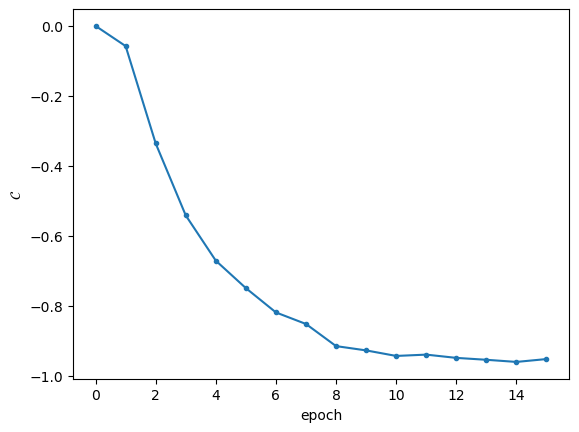

In [57]:
plot_chern(torch.tensor(nu_map).mean(axis=0))

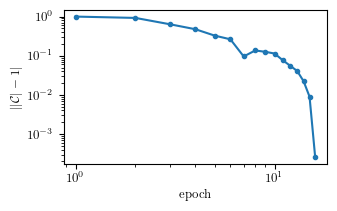

In [34]:
fig,ax=plt.subplots(figsize=(3.4,2))
plot_chern(nu_list,log=True,C=1,ax=ax)
# fig.savefig('C0C1_log.pdf',bbox_inches='tight')

In [24]:
z1=purify(z1)

In [25]:
torch.linalg.svdvals(z1)

tensor([1.0015, 1.0015, 1.0015,  ..., 1.0000, 1.0000, 1.0000], device='cuda:0')

# Load

In [59]:
# rs = torch.load('class_A_2D_L10_nshell2_tf10.pt', map_location='cpu')
# rs = torch.load('class_A_2D_L20_nshell2_tf30.pt', map_location='cpu')
rs = torch.load('class_A_2D_L20_nshell2_tf100_truncate.pt', map_location='cpu')
# rs = torch.load('class_A_2D_L20_nshell2_tf200_truncate.pt', map_location='cpu')
# rs = torch.load('class_A_2D_L20_nshell2_tf1000_truncate.pt', map_location='cpu')
# rs = torch.load('class_A_2D_L20_nshell2_tf50_truncate.pt', map_location='cpu')

# rs = torch.load('class_A_2D_L30_nshell2_tf40_truncate.pt', map_location='cpu')
# rs = torch.load('class_A_2D_L30_nshell2_tf30.pt', map_location='cpu')

# rs = torch.load('class_A_2D_L35_nshell2_tf50_truncate.pt', map_location='cpu')

/tmp/ipykernel_149811/1534986859.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  rs = torch.load('class_A_2D_L20_nshell2_tf100_truncate.pt', map_location='cpu')


In [ ]:
for idx in range(len(rs['C_r'])):
    fig,ax=plt.subplots(2,1)
    plot_C_r(rs['C_r'][idx][0],ax,bottomcb=False)

In [ ]:
for idx in range(len(rs['EC'])):
    fig,ax=plt.subplots(1,2,figsize=(5,2.5))
    plot_EC(rs['EC'][idx],ax=ax,vmax=None)

In [61]:
fig,ax=plt.subplots(2,2,figsize=(6,6),)
i=1000

epoch=ax[1,0].text(1,-0.18,f'Epoch: {i}',transform=ax[1,0].transAxes,ha='center',fontsize=12)
ax_C=ax[:,1]
im0,im1,cross0,cross1=plot_C_r(rs['C_r'][i][0],ax=ax_C,bottomcb=False,)

ax_EC=ax[:,0]
EC_im0,EC_im1,EC_cross0,EC_cross1,EC_cb0,EC_cb1=plot_EC(rs['EC'][i],ax=ax_EC,bottomcb=False,vmax=None)




# fig.savefig('C_m_history.png')

Error in callback <function _draw_all_if_interactive at 0x7f11fac7d9e0> (for post_execute), with arguments args (),kwargs {}:


ValueError: 
s(\bm{r})
  ^
ParseFatalException: Unknown symbol: \bm, found '\'  (at char 2), (line:1, col:3)

ValueError: 
s(\bm{r})
  ^
ParseFatalException: Unknown symbol: \bm, found '\'  (at char 2), (line:1, col:3)

<Figure size 600x600 with 4 Axes>

In [125]:
vmax_dict={8:0.03,100:1e-2,140:1e-3,}

In [126]:
def update(frame):
    print(frame)
    im0.set_data(np.tanh(rs['C_r'][frame][0,0]))
    im1.set_data(np.tanh(rs['C_r'][frame][0,1]))
    EC_im0.set_data(rs['EC'][frame][0]/np.log(2))
    EC_im1.set_data(rs['EC'][frame][1]/np.log(2))
    epoch.set_text(f'Epoch: {frame}')
    for t,vmax in vmax_dict.items():
        if frame>t:
            EC_im0.set_clim(vmin=0,vmax=vmax)
            EC_im1.set_clim(vmin=0,vmax=vmax)
            EC_cb0.update_normal(EC_im0)
            EC_cb0.set_ticks([0,vmax])
            EC_cb0.ax.xaxis.set_ticks_position('top')
            continue
        
        


In [127]:
import matplotlib.animation as animation

In [128]:
ani = animation.FuncAnimation(
    fig, 
    update, 
    frames=range(len(rs['C_r'])),  # Generate frames from 0 to 40
    # frames=range(i,i+10),  # Generate frames from 0 to 40
    blit=False    # Blit optimizes the rendering
)

In [129]:
ani.save('L20_truncate_200.mp4', writer='ffmpeg', fps=3,dpi=200)
# ani.save('L20_overlap_200.mp4', writer='ffmpeg', fps=3,dpi=200)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


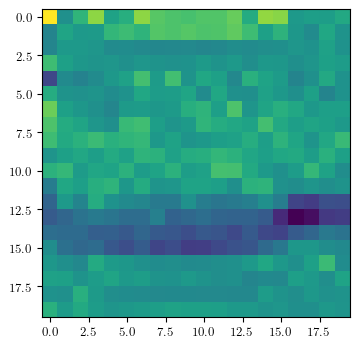

In [134]:
plt.imshow(rs['EC'][-1][0])

Text(0, 0.5, 'sum EC over $j$')

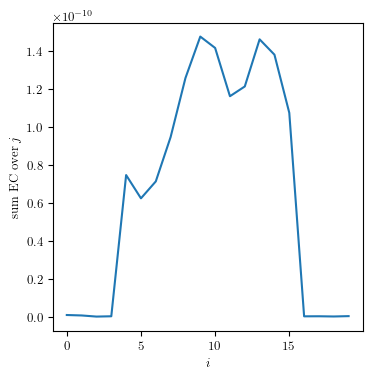

In [133]:
fig,ax=plt.subplots(figsize=(4,4))
ax.plot(rs['EC'][-100][0].sum(axis=1))
ax.set_xlabel('$i$')
ax.set_ylabel('sum EC over $j$')

In [73]:
rs['EC'][-1][0].sum(axis=1)[:17].sum()

tensor(1.2409, dtype=torch.float64)

Text(0, 0.5, 'sum of EC')

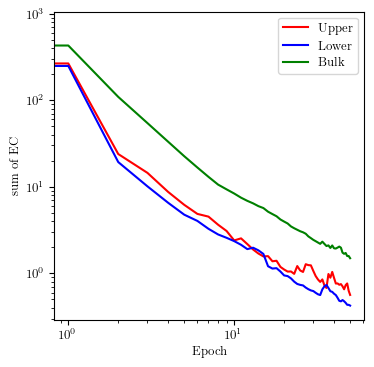

In [76]:
fig,ax=plt.subplots(figsize=(4,4))
ax.plot([rs['EC'][idx][0][:10].sum() for idx in range(len(rs['EC']))],color='r',label='Upper')
ax.plot([rs['EC'][idx][0][25:].sum() for idx in range(len(rs['EC']))],color='b',label='Lower')
ax.plot([rs['EC'][idx][0][10:25].sum() for idx in range(len(rs['EC']))],color='g',label='Bulk')
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel('sum of EC')
# ax[1].plot([rs['EC'][idx][0].sum(axis=1)[17:].sum() for idx in range(len(rs['EC']))])

In [65]:
rs['EC'][-1][0][:17].sum()

tensor(1.2409, dtype=torch.float64)

In [64]:
rs['EC'][-1][0][:,:17].sum()

tensor(1.2193, dtype=torch.float64)

Text(0, 0.5, 'sum of EC')

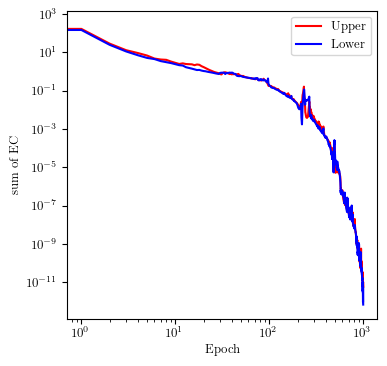

In [135]:
fig,ax=plt.subplots(figsize=(4,4))
ax.plot([rs['EC'][idx][0].sum(axis=1)[:10].sum() for idx in range(len(rs['EC']))],color='r',label='Upper')
ax.plot([rs['EC'][idx][0].sum(axis=1)[10:].sum() for idx in range(len(rs['EC']))],color='b',label='Lower')
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel('sum of EC')
# ax[1].plot([rs['EC'][idx][0].sum(axis=1)[17:].sum() for idx in range(len(rs['EC']))])

## Critical phase

In [178]:
def get_mean_std(rs,L_list):
    mean_list=[]
    sem_list=[]
    x_list=[]
    for L in L_list:
        n= (L-1)//2-1
        print(L,n)
        if (L,n) in rs:
            data = torch.tensor(rs[(L,n)]['EE'])
            mean_list.append(data.mean(axis=0)[-1].item())
            sem_list.append(data.std(axis=0)[-1].item()/np.sqrt(data.shape[0]))
            x_list.append(L)
    return np.array(x_list),np.array(mean_list),np.array(sem_list)
    
            


    

In [179]:
rs_crit ={}
L_list = range(5,23,2)
mu_list = [2.]
for mu in mu_list:
    for L in L_list:
        nshell_list = range(1,(L-1)//2)
        for nshell in nshell_list:
            try:
                rs_crit[(L,nshell)] = torch.load(f'class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_es10.pt', map_location='cpu')
            except:
                try:
                    rs_crit[(L,nshell)] = torch.load(f'class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_es5.pt', map_location='cpu')
                except:
                    pass


In [180]:
rs_crit.keys()

dict_keys([(5, 1), (7, 1), (7, 2), (9, 1), (9, 2), (9, 3), (11, 1), (11, 2), (11, 3), (11, 4), (13, 1), (13, 2), (13, 3), (13, 4), (13, 5), (15, 1), (15, 2), (15, 3), (15, 4), (15, 5), (15, 6), (17, 1), (17, 2), (17, 3), (17, 4), (17, 5), (17, 6), (17, 7), (19, 1), (19, 2), (19, 3), (19, 4), (19, 5), (19, 6), (19, 7), (21, 1), (21, 2), (21, 3), (21, 4), (21, 5), (21, 6), (21, 7), (21, 8), (21, 9)])

In [181]:
L=11

np.array([(n,torch.tensor(rs_crit[(L,n)]['EE']).mean(axis=0)[-1].item()) for n in range(1,(L-1)//2) if (L,n) in rs_crit.keys()])

array([[ 1.        ,  8.34078955],
       [ 2.        ,  9.57942035],
       [ 3.        ,  9.91651428],
       [ 4.        , 10.04462593]])

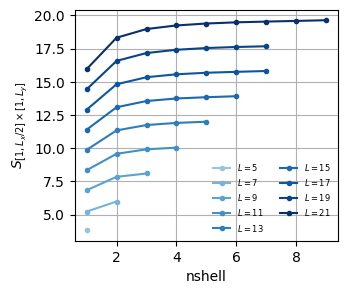

In [182]:
fig,ax=plt.subplots(figsize=(3.4,3))
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data = np.array([(n,torch.tensor(rs_crit[(L,n)]['EE']).mean(axis=0)[-1].item()) for n in range(1,(L-1)//2) if (L,n) in rs_crit.keys()])
    ax.plot(data[:,0],data[:,1],'.-',label=f'$L={L}$',color=next(color_list))
ax.legend(ncols=2,frameon=False,fontsize=6)
ax.grid()

ax.set_xlabel('nshell')
ax.set_ylabel(r'$S_{[1,L_x/2]\times [1,L_y]}$')

# ax.set_xlim(None,8)

fig.savefig('../Rp_SPTD/Fig/EE_nshell_mu2.pdf',bbox_inches='tight')


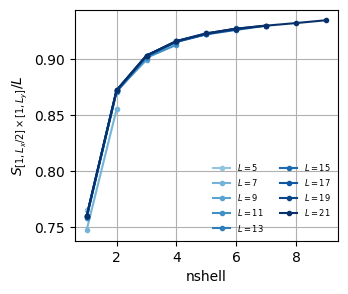

In [183]:
# fig,ax=plt.subplots()
fig,ax=plt.subplots(figsize=(3.4,3))
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))

for L in L_list:
    data = np.array([(n,torch.tensor(rs_crit[(L,n)]['EE']).mean(axis=0)[-1].item()) for n in range(1,(L-1)//2) if (L,n) in rs_crit.keys()])
    ax.plot(data[:,0],data[:,1]/L,'.-',label=f'$L={L}$',color=next(color_list))
ax.legend(ncols=2,frameon=False,fontsize=6)


ax.set_xlabel('nshell')
ax.set_ylabel(r'$S_{[1,L_x/2]\times [1,L_y]}/L$')
ax.grid()

fig.savefig('../Rp_SPTD/Fig/EE_L_nshell_mu2.pdf',bbox_inches='tight')


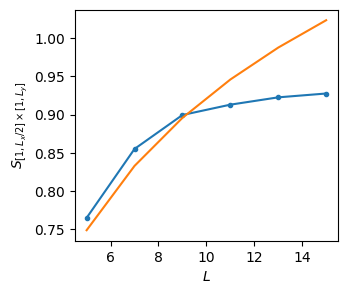

In [116]:
fig,ax=plt.subplots(figsize=(3.4,3))
data=[(L,torch.tensor(rs_crit[(L,(L-1)//2-1)]['EE']).mean(axis=0)[-1].item()/L) for L in L_list if (L,(L-1)//2-1) in rs_crit.keys()]
ax.plot((np.array(data)[:,0]),np.array(data)[:,1],'.-')
ax.set_ylabel(r'$S_{[1,L_x/2]\times [1,L_y]}$')
ax.set_xlabel('$L$')
# ax.set_xscale('log')

ax.plot(np.array(data)[:,0],0.25*np.log(4*np.array(data)[:,0]))

5 1
7 2
9 3
11 4
13 5
15 6
17 7
19 8
21 9


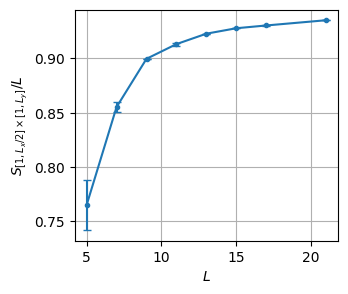

In [165]:
fig,ax=plt.subplots(figsize=(3.4,3))
x_list,mean_list,sem_list = get_mean_std(rs_crit,L_list)
ax.errorbar(x_list,mean_list/x_list,yerr=sem_list/x_list,fmt='.-',capsize=3)

ax.set_xlabel('$L$')
ax.set_ylabel(r'$S_{[1,L_x/2]\times [1,L_y]}/L$')
ax.grid()
fig.savefig('../Rp_SPTD/Fig/EE_L_nshell_max_mu2.pdf',bbox_inches='tight')

5 1
7 2
9 3
11 4
13 5
15 6
17 7
19 8
21 9


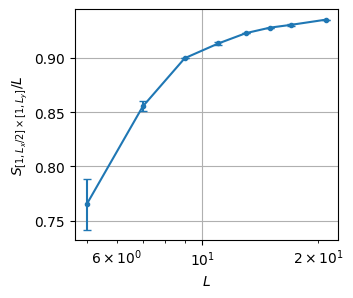

In [166]:
fig,ax=plt.subplots(figsize=(3.4,3))
x_list,mean_list,sem_list = get_mean_std(rs_crit,L_list)
ax.errorbar((x_list),mean_list/x_list,yerr=sem_list/x_list,fmt='.-',capsize=3)

ax.set_xlabel('$L$')
ax.set_ylabel(r'$S_{[1,L_x/2]\times [1,L_y]}/L$')
ax.set_xscale('log')
ax.grid()

fig.savefig('../Rp_SPTD/Fig/EE_L_nshell_max_mu2_log.pdf',bbox_inches='tight')

## Topological

In [169]:
rs_topo ={}
L_list = range(5,17,2)
mu_list = [1.]
for mu in mu_list:
    for L in L_list:
        nshell_list = range(1,(L-1)//2)
        for nshell in nshell_list:
            try:
                rs_topo[(L,nshell)] = torch.load(f'class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_es10.pt', map_location='cpu')
            except:
                pass


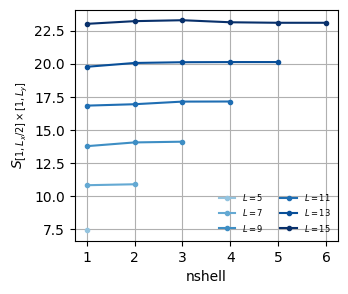

In [170]:
fig,ax=plt.subplots(figsize=(3.4,3))
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data = np.array([(n,torch.tensor(rs_topo[(L,n)]['EE']).mean(axis=0)[-1].item()) for n in range(1,(L-1)//2) if (L,n) in rs_topo.keys()])
    ax.plot(data[:,0],data[:,1],'.-',label=f'$L={L}$',color=next(color_list))
ax.legend(ncols=2,frameon=False,fontsize=6)
ax.grid()

ax.set_xlabel('nshell')
ax.set_ylabel(r'$S_{[1,L_x/2]\times [1,L_y]}$')

# ax.set_xlim(None,8)
fig.savefig('../Rp_SPTD/Fig/EE_nshell_mu1.pdf',bbox_inches='tight')


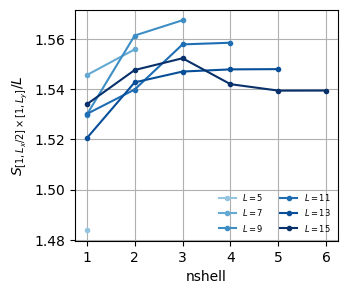

In [171]:
# fig,ax=plt.subplots()
fig,ax=plt.subplots(figsize=(3.4,3))
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))

for L in L_list:
    data = np.array([(n,torch.tensor(rs_topo[(L,n)]['EE']).mean(axis=0)[-1].item()) for n in range(1,(L-1)//2) if (L,n) in rs_topo.keys()])
    ax.plot(data[:,0],data[:,1]/L,'.-',label=f'$L={L}$',color=next(color_list))
ax.legend(ncols=2,frameon=False,fontsize=6)


ax.set_xlabel('nshell')
ax.set_ylabel(r'$S_{[1,L_x/2]\times [1,L_y]}/L$')
ax.grid()

fig.savefig('../Rp_SPTD/Fig/EE_L_nshell_mu1.pdf',bbox_inches='tight')


5 1
7 2
9 3
11 4
13 5
15 6


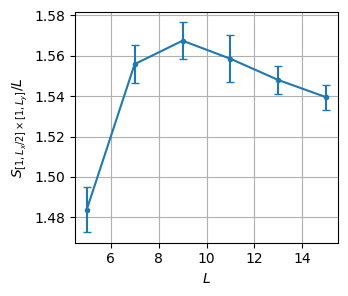

In [172]:
fig,ax=plt.subplots(figsize=(3.4,3))
x_list,mean_list,sem_list = get_mean_std(rs_topo,L_list)
ax.errorbar(x_list,mean_list/x_list,yerr=sem_list/x_list,fmt='.-',capsize=3)

ax.set_xlabel('$L$')
ax.set_ylabel(r'$S_{[1,L_x/2]\times [1,L_y]}/L$')
ax.grid()
fig.savefig('../Rp_SPTD/Fig/EE_L_nshell_max_mu1.pdf',bbox_inches='tight')

##  Trivial

In [174]:
rs_trivial ={}
L_list = range(5,17,2)
mu_list = [3.]
for mu in mu_list:
    for L in L_list:
        nshell_list = range(1,(L-1)//2)
        for nshell in nshell_list:
            try:
                rs_trivial[(L,nshell)] = torch.load(f'class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_es10.pt', map_location='cpu')
            except:
                pass


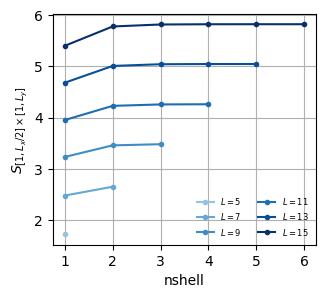

In [175]:
fig,ax=plt.subplots(figsize=(3.4,3))
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data = np.array([(n,torch.tensor(rs_trivial[(L,n)]['EE']).mean(axis=0)[-1].item()) for n in range(1,(L-1)//2) if (L,n) in rs_trivial.keys()])
    ax.plot(data[:,0],data[:,1],'.-',label=f'$L={L}$',color=next(color_list))
ax.legend(ncols=2,frameon=False,fontsize=6)
ax.grid()

ax.set_xlabel('nshell')
ax.set_ylabel(r'$S_{[1,L_x/2]\times [1,L_y]}$')

# ax.set_xlim(None,8)
fig.savefig('../Rp_SPTD/Fig/EE_nshell_mu3.pdf',bbox_inches='tight')


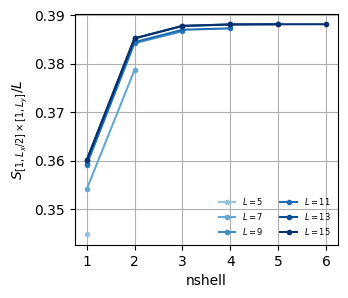

In [176]:
# fig,ax=plt.subplots()
fig,ax=plt.subplots(figsize=(3.4,3))
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))

for L in L_list:
    data = np.array([(n,torch.tensor(rs_trivial[(L,n)]['EE']).mean(axis=0)[-1].item()) for n in range(1,(L-1)//2) if (L,n) in rs_trivial.keys()])
    ax.plot(data[:,0],data[:,1]/L,'.-',label=f'$L={L}$',color=next(color_list))
ax.legend(ncols=2,frameon=False,fontsize=6)


ax.set_xlabel('nshell')
ax.set_ylabel(r'$S_{[1,L_x/2]\times [1,L_y]}/L$')
ax.grid()

fig.savefig('../Rp_SPTD/Fig/EE_L_nshell_mu3.pdf',bbox_inches='tight')


5 1
7 2
9 3
11 4
13 5
15 6


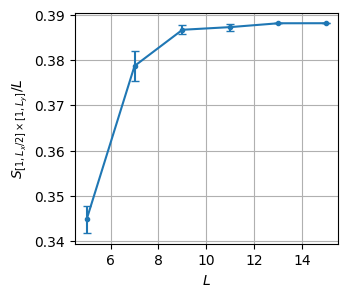

In [177]:
fig,ax=plt.subplots(figsize=(3.4,3))
x_list,mean_list,sem_list = get_mean_std(rs_trivial,L_list)
ax.errorbar(x_list,mean_list/x_list,yerr=sem_list/x_list,fmt='.-',capsize=3)

ax.set_xlabel('$L$')
ax.set_ylabel(r'$S_{[1,L_x/2]\times [1,L_y]}/L$')
ax.grid()
fig.savefig('../Rp_SPTD/Fig/EE_L_nshell_max_mu3.pdf',bbox_inches='tight')

5 1
7 2
9 3
11 4
13 5
15 6


<ErrorbarContainer object of 3 artists>

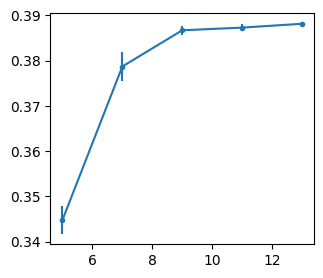

In [115]:
fig,ax=plt.subplots(figsize=(3.4,3))
x_list,mean_list,sem_list = get_mean_std(rs_trivial,L_list)
# ax.errorbar(x_list,mean_list,yerr=sem_list,fmt='.-')
ax.errorbar(x_list,mean_list/x_list,yerr=sem_list/x_list,fmt='.-')

Text(0.5, 0, '$L$')

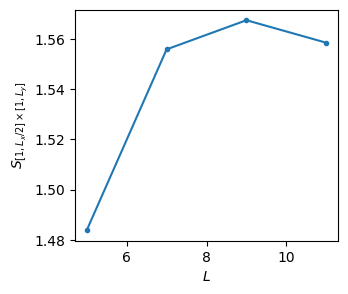

In [34]:
fig,ax=plt.subplots(figsize=(3.4,3))
data=[(L,torch.tensor(rs_topo[(L,(L-1)//2-1)]['EE']).mean(axis=0)[-1].item()/L) for L in L_list if (L,(L-1)//2-1) in rs_topo.keys()]


ax.plot(np.array(data)[:,0],np.array(data)[:,1],'.-')
ax.set_ylabel(r'$S_{[1,L_x/2]\times [1,L_y]}$')
ax.set_xlabel('$L$')

In [48]:
[(L,torch.tensor(rs_crit[(L,(L-1)//2)]['EE']).mean(axis=0)[-1].item()) for L in L_list]


KeyError: (15, 7)

In [13]:
torch.tensor(rs['Chern'])

tensor([[ 0.0000e+00, -8.3829e-48, -2.2224e-06, -2.8175e-05, -6.1616e-05,
         -6.1961e-05, -6.2142e-05, -6.2129e-05, -6.2167e-05, -6.2167e-05,
         -6.2167e-05, -6.2167e-05, -6.2261e-05, -6.2261e-05, -6.2261e-05,
         -6.2261e-05],
        [ 0.0000e+00, -8.3829e-48,  6.6527e-05, -5.3107e-05, -5.8126e-05,
         -6.0240e-05, -6.1726e-05, -6.2173e-05, -6.2179e-05, -6.2261e-05,
         -6.2261e-05, -6.2261e-05, -6.2261e-05, -6.2261e-05, -6.2261e-05,
         -6.2261e-05],
        [ 0.0000e+00, -8.3829e-48, -8.3573e-06, -1.7608e-04, -4.8789e-05,
         -5.6891e-05, -6.2099e-05, -6.2093e-05, -6.2167e-05, -6.2261e-05,
         -6.2261e-05, -6.2261e-05, -6.2261e-05, -6.2261e-05, -6.2261e-05,
         -6.2261e-05],
        [ 0.0000e+00, -8.3829e-48, -1.1284e-05, -3.3054e-05, -6.0105e-05,
         -6.1121e-05, -6.2093e-05, -6.2261e-05, -6.2261e-05, -6.2261e-05,
         -6.2261e-05, -6.2261e-05, -6.2261e-05, -6.2261e-05, -6.2261e-05,
         -6.2261e-05],
        [ 0.0000e+00

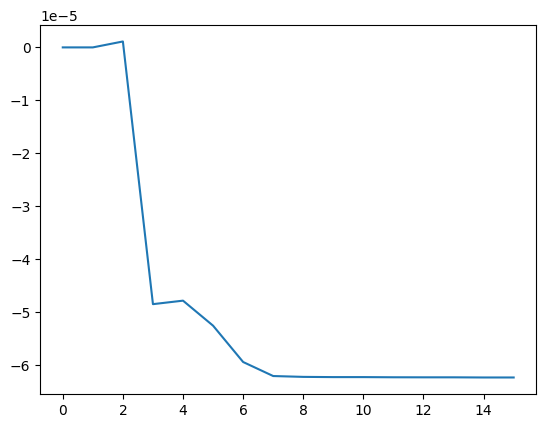

In [17]:
plt.plot(torch.tensor(rs['Chern']).mean(axis=0))

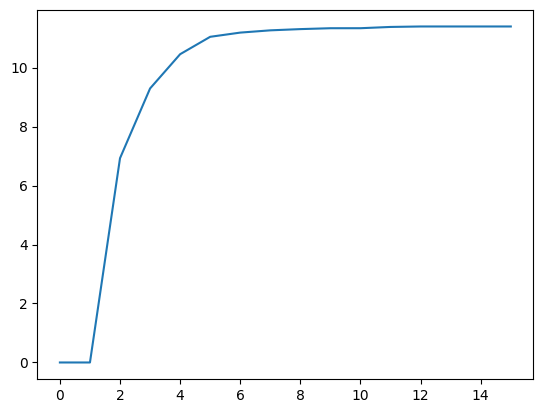

In [16]:
plt.plot(torch.tensor(rs['EE']).mean(axis=0))

In [55]:
rs['EC'][-1][0].sum(axis=1)[:10].sum()

tensor(0.5806, dtype=torch.float64)

In [ ]:
y=A/epoch + B

In [23]:
rs['EC'][-1][0].sum(axis=1)[17:].sum()

tensor(1.2411, dtype=torch.float64)

In [150]:
z0=gtn2_torch.C_m.cpu().clone()

In [153]:
measure_feedback_layer(gtn2_torch)

100%|██████████| 400/400 [00:04<00:00, 98.43it/s] 


In [159]:
%timeit measure_feedback_layer(gtn2_torch)

100%|██████████| 400/400 [00:02<00:00, 163.19it/s]

2.73 s ± 299 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit measure_feedback_layer(gtn2_torch)

100%|██████████| 400/400 [00:02<00:00, 180.89it/s]

2.38 s ± 155 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [154]:
z1=gtn2_torch.C_m.cpu().clone()

In [155]:
torch.allclose(z0,z1)

True

In [68]:
torch.allclose(z0,gtn2_torch.C_m.cpu())

True

In [16]:
torch.abs(torch.einsum(gtn2_torch.C_m,[0,1],gtn2_torch.C_m,[1,0],[0])+1).max()

tensor(2.3452e-06, device='cuda:0', dtype=torch.float64)

In [18]:
def purify(A):
    # purify A, see App. B2 in PhysRevB.106.134206
    U, _, Vh=torch.linalg.svd(A)
    return U@Vh

In [19]:
z=purify(gtn2_torch.C_m)

In [23]:
torch.abs(torch.einsum(z,[0,1],z,[1,0],[0])+1).max()

tensor(2.6246e-13, device='cuda:0', dtype=torch.float64)

In [24]:
gtn2_torch.C_m@gtn2_torch.C_m

tensor([[-1.0000e+00, -6.9959e-16, -2.4727e-09,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 6.4417e-16, -1.0000e+00,  3.8323e-09,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-2.4727e-09,  3.8323e-09, -1.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00, -1.0000e+00]], device='cuda:0', dtype=torch.float64)

In [34]:
torch.abs((z@z)+torch.eye(z.shape[0],device='cuda',dtype=torch.float64)).max()

tensor(2.6201e-13, device='cuda:0', dtype=torch.float64)

In [35]:
torch.allclose((z@z),-torch.eye(z.shape[0],device='cuda',dtype=torch.float64))

True

In [97]:
%timeit measure_feedback_layer(gtn2_torch,)

100%|██████████| 400/400 [00:02<00:00, 143.36it/s]

3.05 s ± 293 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [143]:
%timeit measure_feedback_layer(gtn2_torch,)

100%|██████████| 400/400 [00:01<00:00, 301.92it/s]

1.39 s ± 64.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [171]:
z=torch.tensor([1,2,4])

In [98]:
%lprun -f gtn2_torch.measure_single_mode_Born measure_feedback_layer(gtn2_torch,)

100%|██████████| 400/400 [00:02<00:00, 142.55it/s]


Timer unit: 1e-09 s

Total time: 2.23365 s
File: /home/hnpan/GTN/GTN2_torch.py
Function: measure_single_mode_Born at line 130

Line #      Hits         Time  Per Hit   % Time  Line Contents
   130                                               def measure_single_mode_Born(self,legs,mode):
   131                                                   """measure the single mode with mode = (wf, n), wavefunction and occupation number 
   132                                                   """
   133       800  806149221.0 1007686.5     36.1          legs=torch.tensor(legs,device=self.device)
   134       800   39828639.0  49785.8      1.8          Gamma = self.C_m[legs[:,None],legs[None,:]]
   135       800  219266636.0 274083.3      9.8          n = self.get_Born_single_mode(Gamma=Gamma,mode=mode,rng=self.rng)
   136       800 1168126765.0 1460158.5     52.3          self.measure_single_mode_force(kind=(mode,n),ix=legs)
   137       800     276761.0    346.0      0.0          return (mode,n)

In [20]:
%lprun -f purify measure_feedback_layer(gtn2_torch,)

100%|██████████| 100/100 [00:26<00:00,  3.83it/s]


Timer unit: 1e-09 s

Total time: 25.594 s
File: /home/hnpan/GTN/utils_torch.py
Function: purify at line 48

Line #      Hits         Time  Per Hit   % Time  Line Contents
    48                                           def purify(A):
    49       230 25588765805.0 111255503.5    100.0      U, _, Vh=torch.linalg.svd(A)
    50       230    5228016.0  22730.5      0.0      return U@Vh

In [21]:
111255503.5/1e6

111.2555035

In [ ]:
%lprun -f purify measure_feedback_layer(gtn2_torch,)

In [18]:
%timeit torch.linalg.svd(gtn2_torch.C_m,driver='gesvd')

74.5 ms ± 8.44 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit torch.linalg.eigh(gtn2_torch.C_m/1j)

In [23]:
torch.linalg.svd(gtn2_torch.C_m,driver='gesvd')

torch.return_types.linalg_svd(
U=tensor([[-2.5537e-04,  4.4020e-02, -5.4253e-03,  ...,  1.8833e-05,
         -5.1753e-02,  2.7000e-04],
        [ 7.7587e-03, -5.6294e-02, -7.2406e-02,  ...,  8.5907e-03,
         -4.6422e-02, -9.9476e-03],
        [-1.7822e-02,  1.4610e-03,  2.3213e-02,  ...,  4.8628e-02,
         -5.2428e-02, -8.7792e-03],
        ...,
        [-2.2226e-02,  5.6293e-02, -2.2022e-02,  ..., -4.8094e-02,
         -3.8499e-03, -4.5338e-03],
        [ 5.1551e-02,  2.3581e-02, -1.5027e-02,  ..., -5.0315e-03,
          1.4565e-02, -3.5377e-02],
        [ 2.4744e-02, -3.5089e-02, -1.8049e-02,  ..., -3.0509e-02,
         -8.0133e-02, -1.4957e-03]], device='cuda:0', dtype=torch.float64),
S=tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000

In [28]:
z=gtn2_torch.C_m.cpu().numpy()

In [30]:
%timeit np.linalg.svd(z)

124 ms ± 813 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
%timeit np.linalg.eigh(z/1j)

126 ms ± 775 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%lprun -f gtn2_torch.measure_single_mode_force measure_feedback_layer(gtn2_torch,)

In [14]:
%lprun -f P_contraction_torch gtn2_torch.measure_feedback([0,1])

tensor(1.7881e-06, device='cuda:0')
tensor(2.0266e-06, device='cuda:0')
tensor(2.1458e-06, device='cuda:0')
tensor(2.4438e-06, device='cuda:0')


Timer unit: 1e-09 s

Total time: 0.527896 s
File: /home/hnpan/GTN/utils_torch.py
Function: P_contraction_torch at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def P_contraction_torch(Gamma,Upsilon,ix,ix_bar,device,err,Gamma_like=None,reset_Gamma_like=True,):
     3                                               """ same analytical expression for contraction as _contraction(), differences:
     4                                               1. assume intput and output tensor have the same shape, thus, it should be Gamma(L,R) -- Upsilon (L,R), where Gamma_R = Upsilon_L =Upsilon_R, such that in-place operator is applied here.
     5                                               2. manually compute the inverse of mat2 before
     6                                               Here, Gamma is m, and proj is Upsilon
     7                                               Assume Upsilon = [A,B;C,D], the logic is to first 

In [11]:
%timeit gtn2_torch.measure_feedback([0,1])

24.4 ms ± 29.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
%timeit gtn2_torch.randomize([0,1])

74.2 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [136]:
%lprun -f gtn2_torch.measure gtn2_torch.randomize([0,1])

Timer unit: 1e-09 s

Total time: 0.00127411 s
File: /home/hnpan/GTN/GTN2_torch.py
Function: measure at line 181

Line #      Hits         Time  Per Hit   % Time  Line Contents
   181                                           
   182                                               def measure(self,n,ix):
   183                                                   ''' Majorana site index for ix, 
   184         1     315800.0 315800.0     24.8          n should be a scalar'''
   185         1      13756.0  13756.0      1.1          # ix_bar=torch.tensor(list(self.full_ix-set(ix)),device=self.device)
   186         1        361.0    361.0      0.0          self.ix_bool[ix]=True
   187         1     183645.0 183645.0     14.4          ix_bar = torch.nonzero(~self.ix_bool,as_tuple=True)[0]
   188         1     756443.0 756443.0     59.4          Psi=self.C_m
   189                                                   proj=self.kraus(n)
   190         1        852.0    852.0      0.1          P_cont

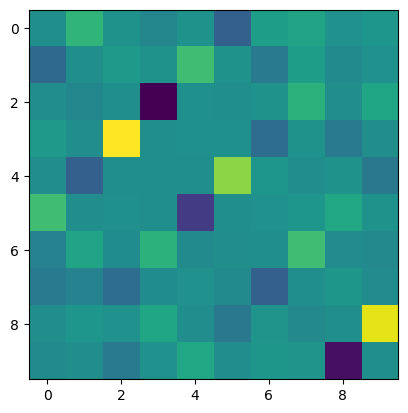

In [39]:
plt.imshow(gtn2_torch.C_m.cpu()[:10,:10])

In [8]:
device = torch.device("cuda")

In [10]:
# Ggpu=torch.from_numpy(Gamma).cuda()
op_gpu= torch.from_numpy(op).cuda()
ix_gpu = torch.from_numpy(np.array(ix)).cuda()
ix_bar_gpu = torch.from_numpy(np.array(ix_bar)).cuda()
err = torch.tensor(1e-10,device=device)

In [43]:
op

NameError: name 'op' is not defined

In [12]:
P_contraction_torch(gtn2_torch.C_m,op_gpu,ix_gpu,ix_bar_gpu,device=device,err=err)

In [ ]:
%lprun -f P_contraction_torch P_contraction_torch(Ggpu,op_gpu,ix_gpu,ix_bar_gpu,device=device,err=err)

In [17]:
%timeit P_contraction_torch(Ggpu,op_gpu,ix_gpu,ix_bar_gpu,device=device)

42.2 ms ± 5.03 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [143]:
%timeit P_contraction_torch(Ggpu,op_gpu,ix_gpu,ix_bar_gpu,device=device,err=err)

50.9 ms ± 111 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [155]:
%timeit P_contraction_torch(Ggpu,op_gpu,ix_gpu,ix_bar_gpu,device=device,err=err)

12.4 ms ± 22.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [137]:
%timeit P_contraction_torch(Ggpu,op_gpu,ix_gpu,ix_bar_gpu,device=device,err=err)

51.3 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [156]:
Ggpu

tensor([[ 0.0000,  0.9600,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.9600,  0.0000,  0.0400,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000, -0.0400,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.0000, -0.0000, -0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0000, -0.0000, -0.0000,  ...,  0.0000,  0.0000, -1.0000],
        [-0.0000, -0.0000, -0.0000,  ...,  0.0000,  1.0000,  0.0000]],
       device='cuda:0', dtype=torch.float64)

In [188]:
Gz=purify(Ggpu)

In [190]:
torch.allclose(Gz,Ggpu)

True

In [187]:
%timeit purify(Ggpu)

1.38 s ± 2.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [160]:
val,vec=torch.linalg.eigh(Ggpu/1j)

In [177]:
U, S, Vh =torch.linalg.svd(Ggpu)

In [180]:
np.linalg.svd(np.array([[0,-1],[1,0]]))

(array([[ 0., -1.],
        [-1.,  0.]]),
 array([1., 1.]),
 array([[-1., -0.],
        [ 0.,  1.]]))

In [178]:
S

tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000], device='cuda:0',
       dtype=torch.float64)

In [185]:
torch.allclose(U@Vh,Ggpu)

True

In [176]:
Vh

tensor([[ 8.8166e-03-0.0000j,  0.0000e+00-0.0170j, -2.5560e-01-0.0000j,
          ...,  0.0000e+00-0.0000j,  0.0000e+00-0.0000j,
          0.0000e+00-0.0000j],
        [ 1.7594e-02-0.0000j,  0.0000e+00+0.0041j, -9.5215e-01-0.0000j,
          ...,  0.0000e+00-0.0000j,  0.0000e+00-0.0000j,
          0.0000e+00-0.0000j],
        [-1.3285e-01-0.0000j,  0.0000e+00-0.0639j, -1.2723e-01-0.0000j,
          ...,  0.0000e+00-0.0000j,  0.0000e+00-0.0000j,
          0.0000e+00-0.0000j],
        ...,
        [-8.6209e-03-0.0000j,  0.0000e+00-0.0356j, -6.8445e-04-0.0000j,
          ...,  0.0000e+00-0.0000j,  0.0000e+00-0.0000j,
          0.0000e+00-0.0000j],
        [ 1.4508e-02-0.0000j,  0.0000e+00-0.0070j,  7.6398e-03-0.0000j,
          ...,  0.0000e+00-0.0000j,  0.0000e+00-0.0000j,
          0.0000e+00-0.0000j],
        [ 1.5218e-02-0.0000j,  0.0000e+00+0.0120j,  4.6112e-03-0.0000j,
          ...,  0.0000e+00-0.0000j,  0.0000e+00-0.0000j,
          0.0000e+00-0.0000j]], device='cuda:0', dtype=tor

In [168]:
vec@vec.T.conj()

tensor([[ 1.0000e+00+0.0000e+00j, -1.0971e-16+4.8945e-17j,
          3.7673e-17-6.0546e-19j,  ...,
          0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
          0.0000e+00+0.0000e+00j],
        [-1.0971e-16-4.8945e-17j,  1.0000e+00+1.8705e-21j,
          7.1700e-19-5.6463e-17j,  ...,
          0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
          0.0000e+00+0.0000e+00j],
        [ 3.7673e-17+6.0546e-19j,  7.1700e-19+4.9596e-17j,
          1.0000e+00-1.1297e-18j,  ...,
          0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
          0.0000e+00+0.0000e+00j],
        ...,
        [ 0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
          0.0000e+00+0.0000e+00j,  ...,
          1.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
          0.0000e+00+0.0000e+00j],
        [ 0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
          0.0000e+00+0.0000e+00j,  ...,
          0.0000e+00+0.0000e+00j,  1.0000e+00+0.0000e+00j,
          0.0000e+00+2.2371e-17j],
        [ 0.0000e+00+0

In [167]:
vec@torch.diag(val)

RuntimeError: expected scalar type ComplexDouble but found Double

In [165]:
vec@torch.diag(val)
# @vec.conj().T

RuntimeError: expected scalar type ComplexDouble but found Double

In [97]:
gtn2.C_m

array([[-1.41370405e-19,  9.14121153e-03,  8.43629885e-04, ...,
         5.45335233e-03,  9.16385308e-03, -4.98478879e-03],
       [-9.14121153e-03,  1.41370405e-19,  1.08348735e-02, ...,
        -8.01868528e-03,  9.43240753e-03, -2.38126923e-02],
       [-8.43629885e-04, -1.08348735e-02,  0.00000000e+00, ...,
         7.01912681e-04,  1.27848725e-02,  2.29915716e-04],
       ...,
       [-5.45335233e-03,  8.01868528e-03, -7.01912681e-04, ...,
         0.00000000e+00,  2.33343122e-02,  1.55717965e-02],
       [-9.16385308e-03, -9.43240753e-03, -1.27848725e-02, ...,
        -2.33343122e-02,  0.00000000e+00,  1.46735660e-02],
       [ 4.98478879e-03,  2.38126923e-02, -2.29915716e-04, ...,
        -1.55717965e-02, -1.46735660e-02,  0.00000000e+00]])

In [127]:
np.allclose(gtn2.C_m,Ggpu.cpu())

True

In [192]:
torch.tensor([[0,1.],[-1.,0]],device=device)

tensor([[ 0.,  1.],
        [-1.,  0.]], device='cuda:0')

In [197]:
device

device(type='cuda')

In [14]:
rng=torch.Generator(device=device)

In [207]:
rng.manual_seed(0)

In [16]:
# torch.normal(0,1,(10,10),generator=rng,device=device)
torch.rand(size=(10, ), generator=rng, device='cuda', dtype=torch.float32)

tensor([0.1452, 0.5480, 0.7146, 0.9941, 0.6706, 0.4023, 0.4849, 0.4496, 0.3975,
        0.3477], device='cuda:0')

In [223]:
torch.vstack([torch.arange(10),torch.arange(10)]).T

tensor([[0, 0],
        [1, 1],
        [2, 2],
        [3, 3],
        [4, 4],
        [5, 5],
        [6, 6],
        [7, 7],
        [8, 8],
        [9, 9]])

In [184]:
def P_contraction_torch(Gamma,Upsilon,ix,ix_bar,device,err,Gamma_like=None,reset_Gamma_like=True,):
    """ same analytical expression for contraction as _contraction(), differences:
    1. assume intput and output tensor have the same shape, thus, it should be Gamma(L,R) -- Upsilon (L,R), where Gamma_R = Upsilon_L =Upsilon_R, such that in-place operator is applied here.
    2. manually compute the inverse of mat2 before
    Here, Gamma is m, and proj is Upsilon
    Assume Upsilon = [A,B;C,D], the logic is to first compute C= (1+ Gamma_RR @ Upsilon_LL)^{-1}, (where then B=-C.T) 
    then A= Upsilon_LL @C, D= Gamma_RR@ C.T
    ---
    reset_Gamma_like: in usual case, because each application of the gate will be like the brick layer, therefore, ix_bar will overwrite the previous. However, for the staircase pattern, one should reset it. 
    """
    Gamma_RR=Gamma[ix[:,None],ix[None,:]]
    Gamma_LR=Gamma[ix_bar[:,None],ix[None,:]]
    Upsilon_LL=Upsilon[:len(ix),:len(ix)]
    Upsilon_RR=Upsilon[len(ix):,len(ix):]
    Upsilon_RL=Upsilon[len(ix):,:len(ix)]
    eye=torch.eye(len(ix),device=device)
    try: 
        C=torch.linalg.inv(Gamma_RR@Upsilon_LL+eye)
        # lu,pivots=torch.linalg.lu_factor(Gamma_RR@Upsilon_LL+eye)
    except:
        raise ValueError("the contraction will lead to a vanishing state")
    A=Upsilon_LL@C
    D=Gamma_RR@C.T
    # A= torch.linalg.lu_solve(lu,pivots,Upsilon_LL,left=False)
    # D= torch.linalg.lu_solve(lu,pivots,Gamma_RR.T).T
    tmp=Gamma_LR@A@Gamma_LR.T
    if Gamma_like is None:
        Gamma_like=torch.zeros_like(Gamma)
    if reset_Gamma_like:
        Gamma_like.fill_(0)
    Gamma_like[ix_bar[:,None],ix_bar[None,:]]=tmp
    Gamma+=Gamma_like
    Gamma[ix[:,None],ix_bar[None,:]]=Upsilon_RL@C@Gamma_LR.T
    # Gamma[ix[:,None],ix_bar[None,:]]=torch.linalg.lu_solve(lu,pivots,Upsilon_RL,left=False)@Gamma_LR.T
    Gamma[ix[:,None],ix[None,:]]=Upsilon_RR+Upsilon_RL@D@Upsilon_RL.T
    Gamma[ix_bar[:,None],ix[None,:]]=-Gamma[ix[:,None],ix_bar[None,:]].T
    # why is it neccessary?
    # Gamma-=Gamma.T
    # Gamma/=2

    if torch.abs(torch.einsum(Gamma,[0,1],Gamma,[1,0],[0])+1).max() > err:
        Gamma=purify(Gamma)
        Gamma-=Gamma.T
        Gamma/=2


def purify(A):
    # purify A, see App. B2 in PhysRevB.106.134206
    U, _, Vh=torch.linalg.svd(A)
    return U@Vh

In [145]:
Ggpu

tensor([[ 0.0000,  0.9600,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.9600,  0.0000,  0.0400,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000, -0.0400,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.0000, -0.0000, -0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0000, -0.0000, -0.0000,  ...,  0.0000,  0.0000, -1.0000],
        [-0.0000, -0.0000, -0.0000,  ...,  0.0000,  1.0000,  0.0000]],
       device='cuda:0', dtype=torch.float64)

In [147]:
Ggpu.shape

torch.Size([7200, 7200])